Your Name and PRN:
- Name : Anurag Sahu
- PRN  : 250840128011
- Date : 23 Nov 2025 

In [1]:
###-----------------
### Import Libraries
###-----------------
import os
import time
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# from theoy.utils.helper import fn_plot_tf_hist, fn_plot_confusion_matrix

In [2]:
###-----------------
### Global Variables
###-----------------
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
modelDir = '../models'
subDir = 'fashion_mnist'
altName = 'A04_fashion_vanila'

RANDOM_STATE = 24 # for initialization ----- REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible results
tf.random.set_seed(RANDOM_STATE)

EPOCHS=100
BATCH_SIZE=64
TEST_SIZE=0.2
TRAIN_SIZE = int(18 * BATCH_SIZE)

ALPHA = 0.001
WEIGHT_DECAY = 0.001
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE=5
MIN_LR = 1e-6

# parameters for Matplotlib
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

CMAP = 'brg' # plt.cm.Spectral

plt.rcParams.update(params)


In [3]:
train_df = pd.read_csv(r"D:\dnn_input\fashion_mnist\fashion-mnist_train.csv")
test_df = pd.read_csv(r"D:\dnn_input\fashion_mnist\fashion-mnist_test.csv")

In [4]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_names = {0: 'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',
               5:'Sandal', 6: 'Shirt',7: 'Sneaker', 8:'Bag', 9: 'Ankle boot'}

In [6]:
X_train,y_train = train_df.drop('label',axis=1),train_df['label']
X_test,y_test = test_df.drop('label',axis =1),test_df['label']
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

## Convert To Dataset

In [7]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train,y_train))
test_ds  = tf.data.Dataset.from_tensor_slices((X_test,y_test))

train_ds = train_ds.shuffle(buffer_size = X_train.shape[0]).batch(BATCH_SIZE)
test_ds = test_ds.shuffle(buffer_size = X_test.shape[0]).batch(BATCH_SIZE)

train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(tf.data.AUTOTUNE)

In [8]:
for batch,(data ,labels) in enumerate(train_ds.take(2)):
    print(f"Batch:{batch}, data: {data.shape}, labels ;{labels}")

Batch:0, data: (64, 784), labels ;[1 7 5 9 2 4 3 2 9 8 8 0 5 9 2 6 8 2 5 8 8 8 9 3 3 6 0 6 9 4 8 8 6 8 8 0 2
 7 7 0 6 4 8 3 6 3 2 2 1 7 0 5 9 7 9 9 9 8 0 7 5 0 1 5]
Batch:1, data: (64, 784), labels ;[0 1 5 5 8 5 2 5 0 0 0 1 1 9 5 3 6 1 4 4 9 3 9 0 3 5 8 0 0 2 9 2 2 3 4 7 6
 1 4 5 9 8 4 2 5 6 7 9 4 9 6 1 1 5 9 4 8 9 9 6 5 4 8 9]


C:\Users\dai\AppData\Local\Temp\ipykernel_9068\3705107632.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(2,4,str(row[0]), color="b", fontsize=14)
C:\Users\dai\AppData\Local\Temp\ipykernel_9068\3705107632.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(10,25,class_names[row[0]],color ="r",fontsize=10)


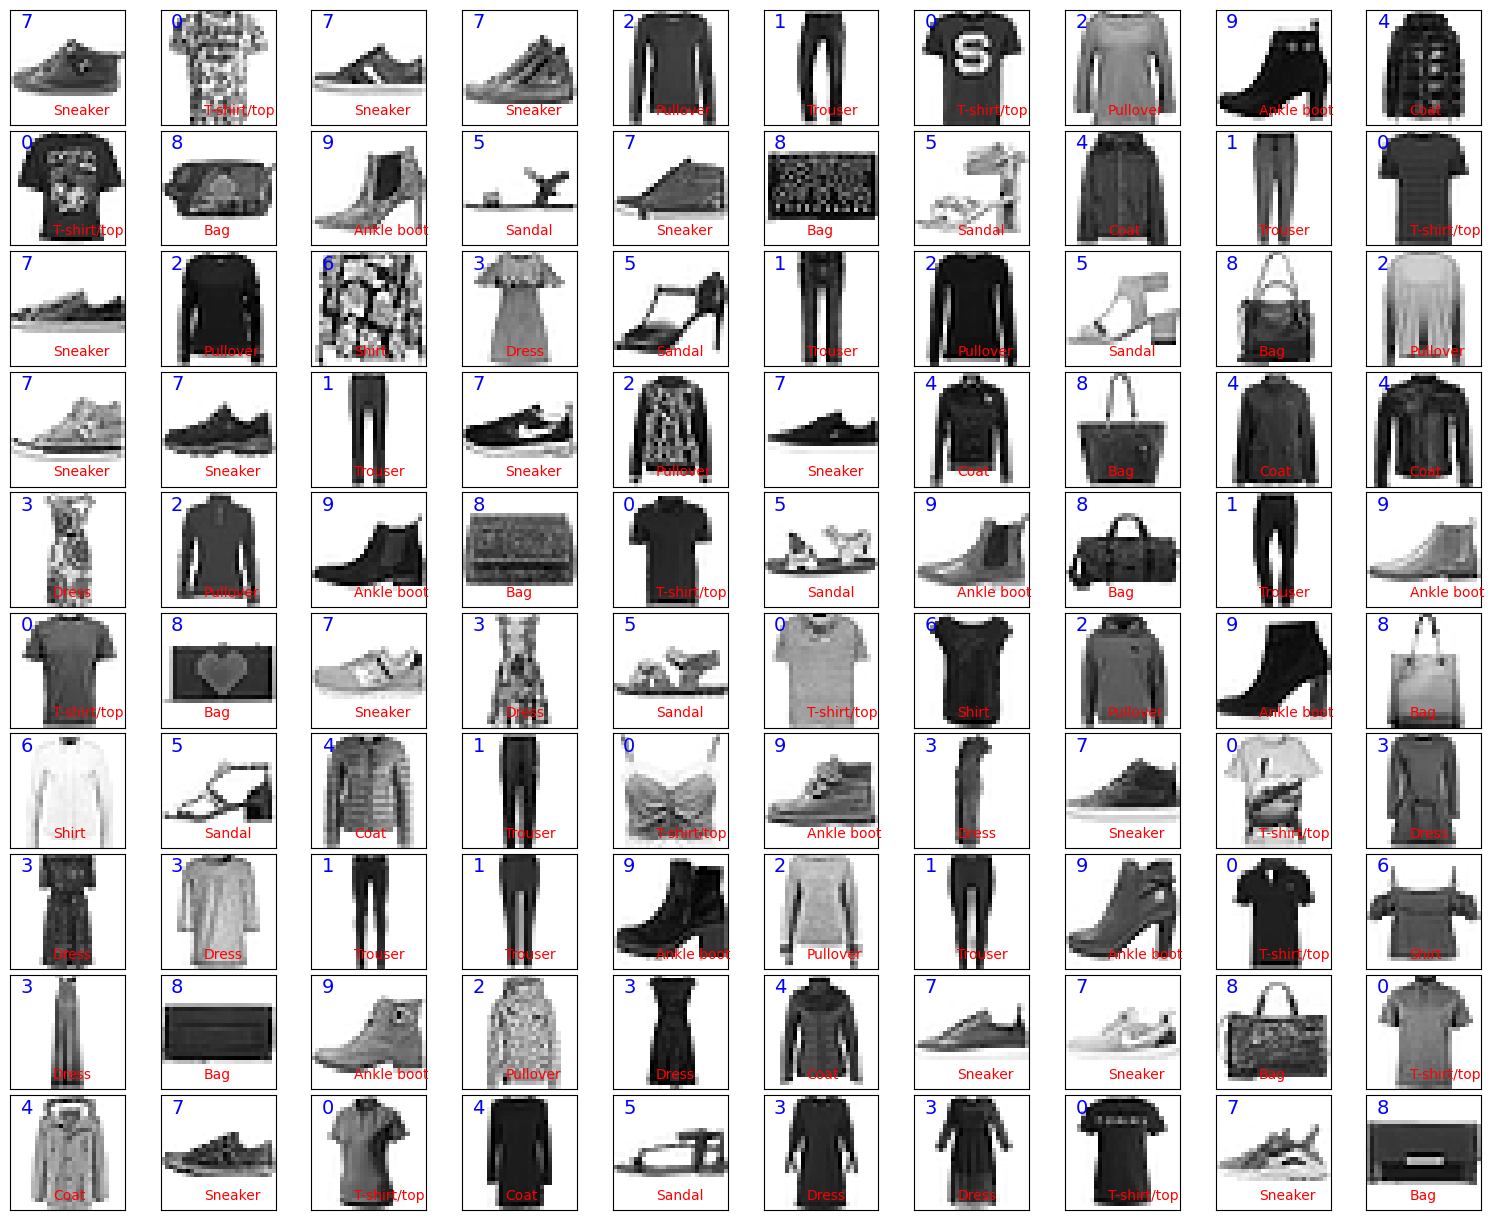

In [9]:
plot_df =train_df.sample(n=100)
fig = plt.figure(figsize =[15,12])
fig.subplots_adjust(left=0, right =1, bottom =0,top =1 ,hspace =0.05, wspace =0.05)

i=0
for _,row in plot_df.iterrows():
    i = i+1
    image =row.values[1:].reshape(28,28)
    ax =fig.add_subplot(10,10,(i),xticks=[],yticks=[])
    ax.imshow(image, cmap=plt.cm.binary, interpolation="nearest")
    ax.text(2,4,str(row[0]), color="b", fontsize=14)
    ax.text(10,25,class_names[row[0]],color ="r",fontsize=10)
plt.show()

## Define model

In [30]:
model = tf.keras.Sequential([
    tf.keras.Input(shape =(X_train.shape[1],)),
    tf.keras.layers.Rescaling(1.0/255),

    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(18,activation='relu'),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10),
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
WeIGHT_DECAY = 0.001
PATENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 5
MIN_LR = 1e-6

lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=MIN_LR,
)

es_callback = tf.keras.callbacks.EarlyStopping(

    monitor="val_loss",
    min_delta=0,
    patience=PATENCE,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [17]:
history = model.fit(train_ds,validation_data=test_ds,epochs=EPOCHS,callbacks=[es_callback,lr_callback])

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6439 - loss: 0.9305 - val_accuracy: 0.7591 - val_loss: 0.5674 - learning_rate: 0.0010
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7844 - loss: 0.5829 - val_accuracy: 0.8259 - val_loss: 0.4781 - learning_rate: 0.0010
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8260 - loss: 0.5095 - val_accuracy: 0.8571 - val_loss: 0.4259 - learning_rate: 0.0010
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8444 - loss: 0.4638 - val_accuracy: 0.8668 - val_loss: 0.4001 - learning_rate: 0.0010
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8533 - loss: 0.4410 - val_accuracy: 0.8596 - val_loss: 0.3944 - learning_rate: 0.0010
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8616 - loss: 0.4099 - val_accuracy: 0.8645 - val_loss: 0.3698 - learning_rate: 0.0010
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8669 - loss: 

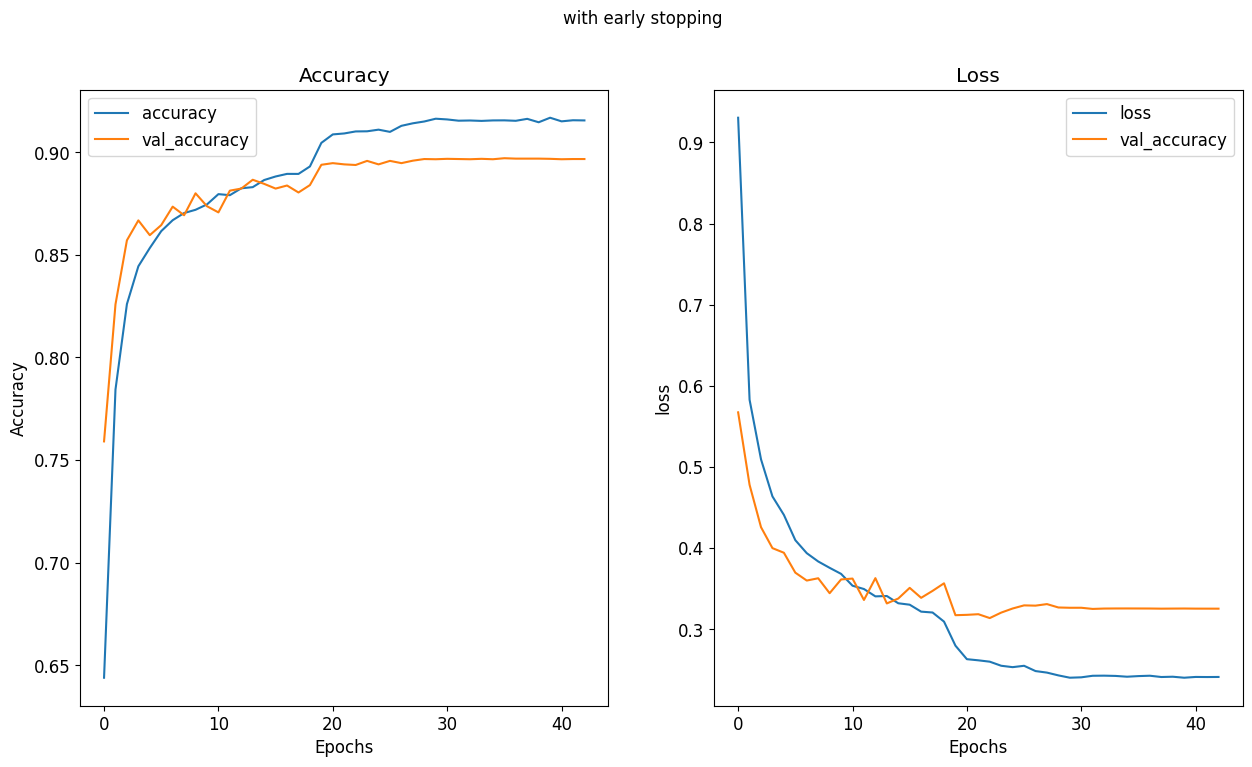

In [19]:
def plot_graph(history):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    fig.suptitle('with early stopping')
    keys=list(history.history.keys())
    ax[0].plot(history.epoch,history.history[keys[0]],label=keys[0])
    ax[0].plot(history.epoch,history.history[keys[2]],label=keys[2])
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.epoch,history.history[keys[1]],label=keys[1])
    ax[1].plot(history.epoch,history.history[keys[3]],label=keys[2])
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    

    plt.show()

plot_graph(history)

## without early stop


In [32]:
history = model.fit(train_ds,validation_data=test_ds,epochs=EPOCHS)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6668 - loss: 0.9162 - val_accuracy: 0.8181 - val_loss: 0.5272
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7973 - loss: 0.5680 - val_accuracy: 0.8359 - val_loss: 0.4666
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8214 - loss: 0.5082 - val_accuracy: 0.8467 - val_loss: 0.4355
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8402 - loss: 0.4623 - val_accuracy: 0.8632 - val_loss: 0.3910
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8528 - loss: 0.4304 - val_accuracy: 0.8701 - val_loss: 0.3838
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8599 - loss: 0.4079 - val_accuracy: 0.8722 - val_loss: 0.3708
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8644 - loss: 0.3948 - val_accuracy: 0.8695 - val_loss: 0.3807
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8694 - loss: 0.3847 - val_a

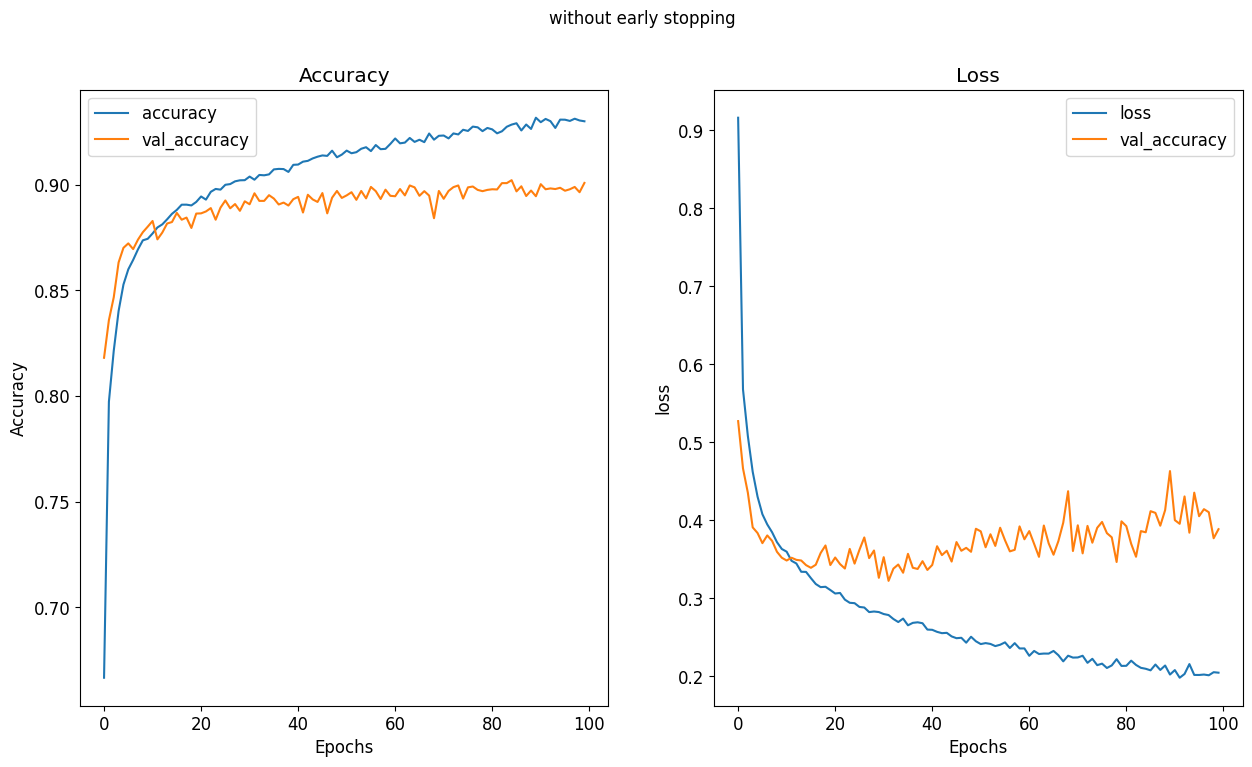

In [34]:
def plot_graph(history):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    fig.suptitle('without early stopping')
    keys=list(history.history.keys())
    ax[0].plot(history.epoch,history.history[keys[0]],label=keys[0])
    ax[0].plot(history.epoch,history.history[keys[2]],label=keys[2])
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.epoch,history.history[keys[1]],label=keys[1])
    ax[1].plot(history.epoch,history.history[keys[3]],label=keys[2])
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    

    plt.show()

plot_graph(history)

## with regularization

In [ ]:
tf.keras.layers.Activation('LeakyReLu')

In [14]:
model = tf.keras.Sequential([
    tf.keras.Input(shape =(X_train.shape[1],)),
    tf.keras.layers.Rescaling(1.0/255),

    tf.keras.layers.Dense(512,kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(256,kernel_regularizer = tf.keras.regularizers.L2(l2=0.001)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128,kernel_regularizer = tf.keras.regularizers.L2(l2=0.001)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64,kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32,kernel_regularizer = tf.keras.regularizers.L2(l2=0.0001)),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(18),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10),
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,validation_data=test_ds,epochs=EPOCHS)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.7376 - loss: 1.1088 - val_accuracy: 0.8269 - val_loss: 0.6897
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8191 - loss: 0.7009 - val_accuracy: 0.8523 - val_loss: 0.5599
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8318 - loss: 0.6233 - val_accuracy: 0.8583 - val_loss: 0.5258
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8384 - loss: 0.5942 - val_accuracy: 0.8568 - val_loss: 0.5339
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8431 - loss: 0.5773 - val_accuracy: 0.8535 - val_loss: 0.5395
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8470 - loss: 0.5660 - val_accuracy: 0.8520 - val_loss: 0.5388
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8487 - loss: 0.5570 - val_accuracy: 0.8500 - val_loss: 0.5380
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8506 - loss: 0.5538 - val_ac

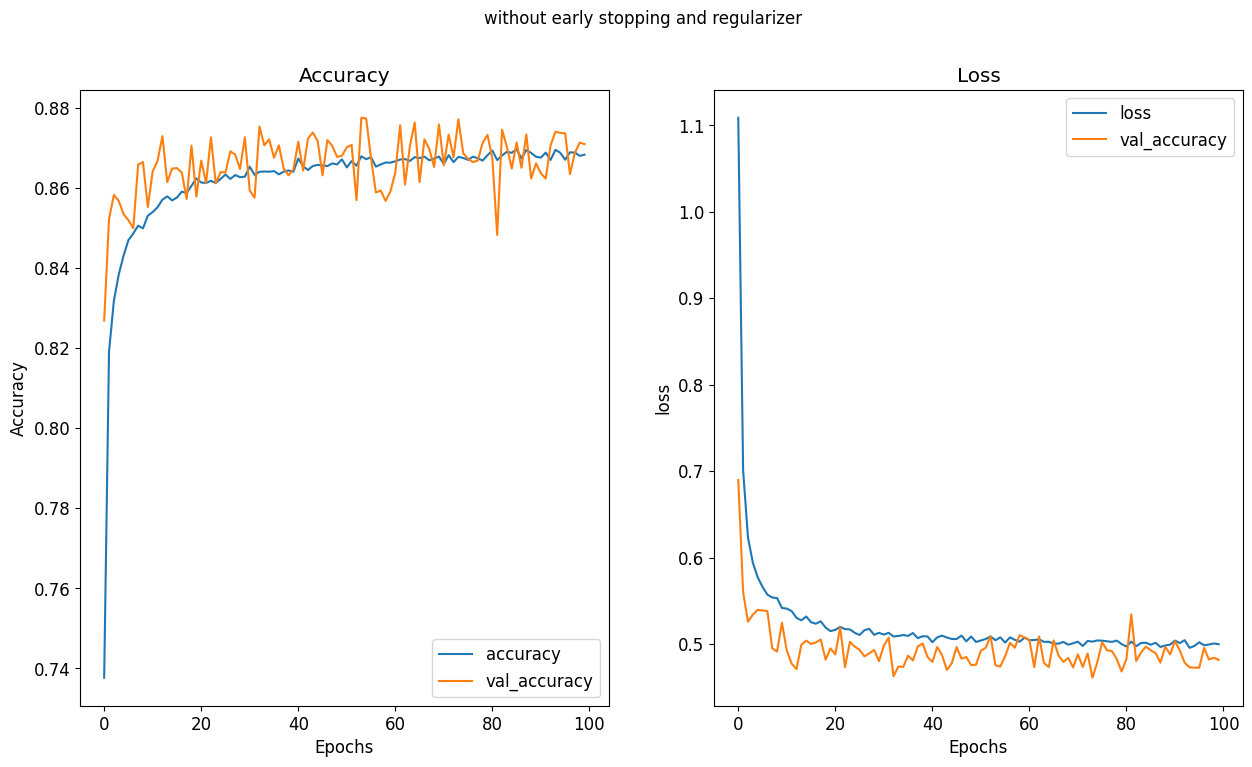

In [16]:
def plot_graph(history):
    fig,ax = plt.subplots(1,2,figsize=(15,8))
    fig.suptitle('without early stopping and regularizer')
    keys=list(history.history.keys())
    ax[0].plot(history.epoch,history.history[keys[0]],label=keys[0])
    ax[0].plot(history.epoch,history.history[keys[2]],label=keys[2])
    ax[0].set_title('Accuracy')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()

    ax[1].plot(history.epoch,history.history[keys[1]],label=keys[1])
    ax[1].plot(history.epoch,history.history[keys[3]],label=keys[2])
    ax[1].set_title('Loss')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()
    

    plt.show()

plot_graph(history)